# Imports


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Helper Functions

In [6]:
#Inspired by https://stackoverflow.com/questions/27084617/detect-strings-with-non-english-characters-in-python

def is_english(string):
    try:
        string.encode(encoding='utf-8').decode('ascii')
        return True
    except UnicodeDecodeError:
        return False

# EDA

In [7]:
posts = pd.read_csv('./data/cleaned_posts.csv')

In [8]:
posts.head()

,title,subreddit
0,CONFIRMED: The Matrix Resurrections will NOT b...,1
1,They used the Pirate Bay logo as the backgroun...,1
2,"In Avengers age of Ultron, Hawkeye finishes ki...",1
3,In Cabin in the Woods (2012) a scientist is ki...,1
4,"Peter Jackson, in his Lord Of The Rings film t...",1


In [9]:
posts.shape

(11191, 2)

In [10]:
posts['subreddit'].value_counts(normalize=True)

1    0.590296
0    0.409704
Name: subreddit, dtype: float64

We have 3424 posts with

> 60.4% from r/ShittyMovieDetails

> 39.5% from r/MovieDetails

In [11]:
posts.head()

,title,subreddit
0,CONFIRMED: The Matrix Resurrections will NOT b...,1
1,They used the Pirate Bay logo as the backgroun...,1
2,"In Avengers age of Ultron, Hawkeye finishes ki...",1
3,In Cabin in the Woods (2012) a scientist is ki...,1
4,"Peter Jackson, in his Lord Of The Rings film t...",1


In [12]:
cvec = CountVectorizer()
X = cvec.fit_transform(posts['title'])

In [13]:
eda = pd.DataFrame(X.todense(), columns = cvec.get_feature_names())

In [14]:
eda

,00,000,001,007,01,02,0259,03,04,048,...,डढणचणह,डभत,ढपहभबबह,फढभड,बढनशबणप,बळभपधखख,しにな,怖い,李心兒,기생충
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We do have some words in other languages. Might be interesting to see if we can see which reddit has more non-english posts

## Nonenglish

In [15]:
eda_w_subreddits = pd.concat([eda,posts['subreddit']],axis=1)

In [16]:
english_cols = np.array([is_english(column) for column in eda_w_subreddits.columns[:-1]])

In [17]:
noneng = eda_w_subreddits.drop(columns = [x for x in  eda_w_subreddits if is_english(x)])

In [18]:
noneng = pd.concat([noneng,posts['subreddit']],axis=1)

In [19]:
noneng = noneng.loc[~(noneng.drop(columns = ['subreddit'])==0).all(axis=1)]

In [20]:
noneng['subreddit'].value_counts()

0    48
1    48
Name: subreddit, dtype: int64

Of our 30 posts with non english characters, 16 are from r/ShittyMovieDetails and 14 are from r/MovieDetails

## Post Length (Word Count)

In [21]:
posts['post_len'] = posts['title'].str.split().str.len()

In [22]:
posts.groupby('subreddit').mean()

,post_len
subreddit,
0,30.688332
1,30.366636


There is no significant difference in word count between posts.

In [23]:
posts.drop(columns=['post_len'],inplace=True)

## Post Length (Char Count)

In [24]:
posts['char_len'] = posts['title'].str.len()

In [25]:
posts.groupby('subreddit').mean()

,char_len
subreddit,
0,173.979935
1,170.070693


There is no significant difference in character length between each subreddit

In [26]:
posts.drop(columns=['char_len'],inplace=True)

## Most Common Words

### Shitty Movie Details

In [27]:
smd_posts = pd.read_csv('./data/smd_posts.csv')

In [28]:
smd_cvec = CountVectorizer(stop_words='english')
smd_X = smd_cvec.fit_transform(smd_posts['title'])

In [29]:
smd_eda = pd.DataFrame(smd_X.todense(), columns = smd_cvec.get_feature_names())

In [30]:
smd_top_25 = smd_eda.sum().sort_values(ascending=False).head(25).reset_index()
smd_top_25

,index,0
0,movie,1846
1,fact,885
2,man,755
3,reference,733
4,film,708
5,character,592
6,actually,579
7,2019,576
8,scene,523
9,star,392


### Movie Details

In [31]:
md_posts = pd.read_csv('./data/md_posts.csv')

In [32]:
md_cvec = CountVectorizer(stop_words='english')
md_X = md_cvec.fit_transform(md_posts['title'])

In [33]:
md_eda = pd.DataFrame(md_X.todense(), columns = md_cvec.get_feature_names())

In [34]:
md_top_25 = md_eda.sum().sort_values(ascending=False).head(25).reset_index()
md_top_25

,index,0
0,movie,694
1,scene,635
2,2019,448
3,man,429
4,film,380
5,seen,293
6,character,278
7,time,270
8,spider,247
9,later,231


## Sentiment Analysis

In [35]:
sent = SentimentIntensityAnalyzer()

In [40]:
sent.polarity_scores('i am ambivalent')

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.128}

In [47]:
posts['neg'] = posts['title'].apply(lambda title: sent.polarity_scores(title)['neg'])

In [53]:
posts['neu'] = posts['title'].apply(lambda title: sent.polarity_scores(title)['neu'])

In [51]:
posts['pos'] = posts['title'].apply(lambda title: sent.polarity_scores(title)['pos'])

In [59]:
posts['sentiment'] = posts[['neg','neu','pos']].idxmax(axis=1)

In [65]:
posts.groupby('subreddit').mean()

,neg,pos,neu
subreddit,,,
0,0.065502,0.055195,0.879304
1,0.089881,0.063671,0.846446


## Conclusion

In [69]:
smd_top_25

,index,0
0,movie,1846
1,fact,885
2,man,755
3,reference,733
4,film,708
5,character,592
6,actually,579
7,2019,576
8,scene,523
9,star,392


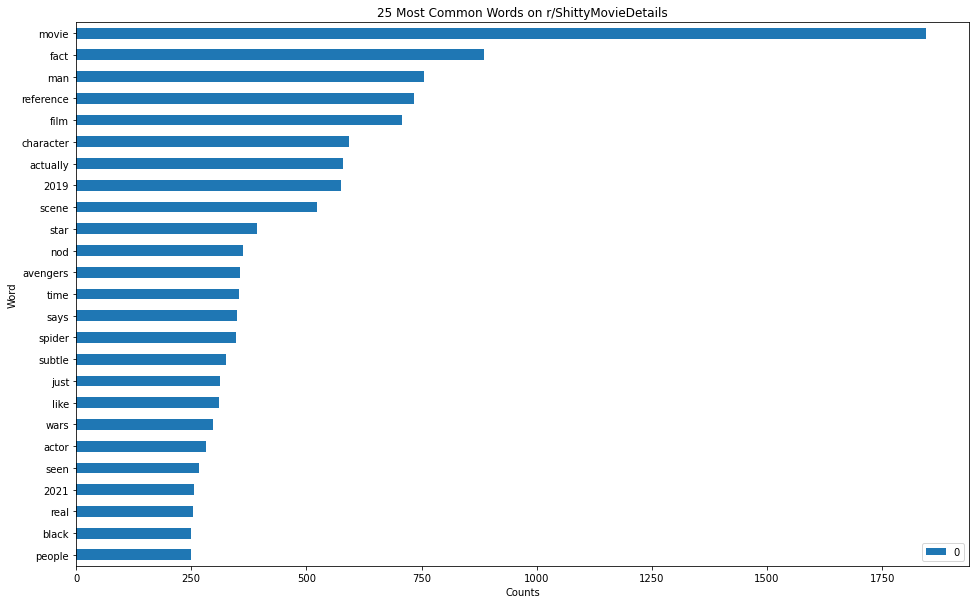

In [92]:
smd_top_25.plot(kind='barh',
                             x='index',
                             figsize=(16,10))
plt.gca().invert_yaxis()
plt.ylabel("Word")
plt.xlabel("Counts")
plt.title("25 Most Common Words on r/ShittyMovieDetails")

plt.savefig('./figures/common_words_smd')

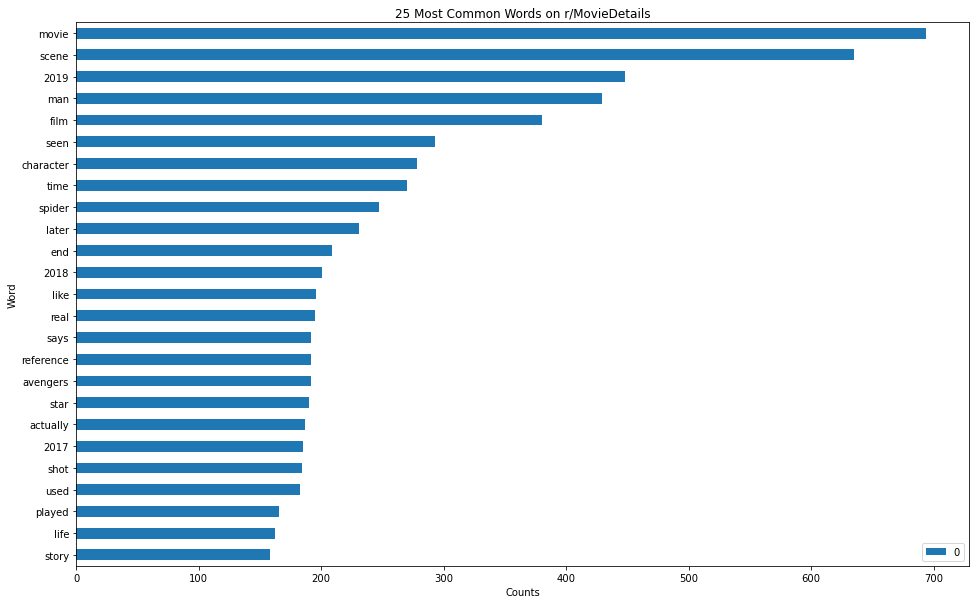

In [93]:
md_top_25.plot(kind='barh',
                             x='index',
                             figsize=(16,10))
plt.gca().invert_yaxis()
plt.ylabel("Word")
plt.xlabel("Counts")
plt.title("25 Most Common Words on r/MovieDetails")
plt.savefig('./figures/common_words_md')

In [31]:
pd.concat([smd_top_25,md_top_25],axis=1)

,index,0,index,0
0,movie,1846,movie,694
1,fact,885,scene,635
2,man,755,2019,448
3,reference,733,man,429
4,film,708,film,380
5,character,592,seen,293
6,actually,579,character,278
7,2019,576,time,270
8,scene,523,spider,247
9,star,392,later,231


Some initial differences include:

 * Older Years (i.e. 2006, 2001, 2004,) appear in r/MovieDetails top 25 words where as r/ShittyMovieDetails 25 words only includes more recent years (2019, 2021)
 
 * John is the only name that made it into r/MovieDetails top 25 words, perhaps in reference to a director or a movie such as John Wick
 